In [1]:
using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/Documents/agh/stopien_2/Project-MIDAS`


In [2]:
using MLJ, DataFrames, CairoMakie, UnROOT, LaTeXStrings
CairoMakie.activate!()

### data from experiment

#### read `.root` files

In [3]:
f_exp = ROOTFile("data/Data_2018_Xib2XicPi_2018_MD.addVar.wMVA.root")

ROOTFile with 2 entries and 21 streamers.
data/Data_2018_Xib2XicPi_2018_MD.addVar.wMVA.root
└─ mytree (TTree)
   ├─ "Xb_ENDVERTEX_X"
   ├─ "Xb_ENDVERTEX_Y"
   ├─ "Xb_ENDVERTEX_Z"
   ├─ "⋮"
   ├─ "pi_PTo"
   ├─ "pi_Po"
   └─ "BDTG_Xib"


In [4]:
df_exp = LazyTree(f_exp, "mytree", ["Xb_M", "Xc_M", "Xb_TAU", "Xc_TAU"]) |> DataFrame

Row,Xb_M,Xc_TAU,Xb_TAU,Xc_M
,Float64,Float64,Float64,Float64
1,5906.68,0.000815827,0.00167324,2510.3
2,5679.12,0.00138945,0.0026473,2468.57
3,5690.74,-0.000351875,0.000806715,2517.45
4,5945.17,0.000624979,0.000491548,2428.47
5,5646.24,0.00113982,0.00240525,2484.98
6,5561.59,1.11562e-6,0.00129938,2444.5
7,5596.13,0.000933746,0.00228823,2439.99
8,6031.52,0.00241897,0.00160916,2491.02
9,5647.72,-2.46276e-5,0.00108872,2462.74


#### simple function for plotting histograms

In [5]:
set_theme!(merge(theme_dark(), theme_latexfonts()) )

In [29]:
function plot_hist(data; title, xlabel="", bins=80, size=(600,400))
    f = Figure(;size=(1200,800))

    ax = Axis(
        f[1, 1],
        title = title,
        xlabel = xlabel,
        ylabel = "Entries [-]"
    )

    hist!(
        data,
        bins = 80,
        color = :yellow,
        strokecolor = :black,
        strokewidth = 1
    )

    f
end

function plot_hist(data, filename::AbstractString; title, xlabel="", bins=80, size=(600,400))
    endswith(filename, r"\.\w+$") || (filename *= ".pdf")

    f = Figure(;size=(1200,800))

    ax = Axis(
        f[1, 1],
        title = title,
        xlabel = xlabel,
        ylabel = "Entries [-]"
    )

    hist!(
        data,
        bins = 80,
        color = :yellow,
        strokecolor = :black,
        strokewidth = 1
    )

    save(filename, f)

    f
end

plot_hist (generic function with 2 methods)

#### plots (precut)

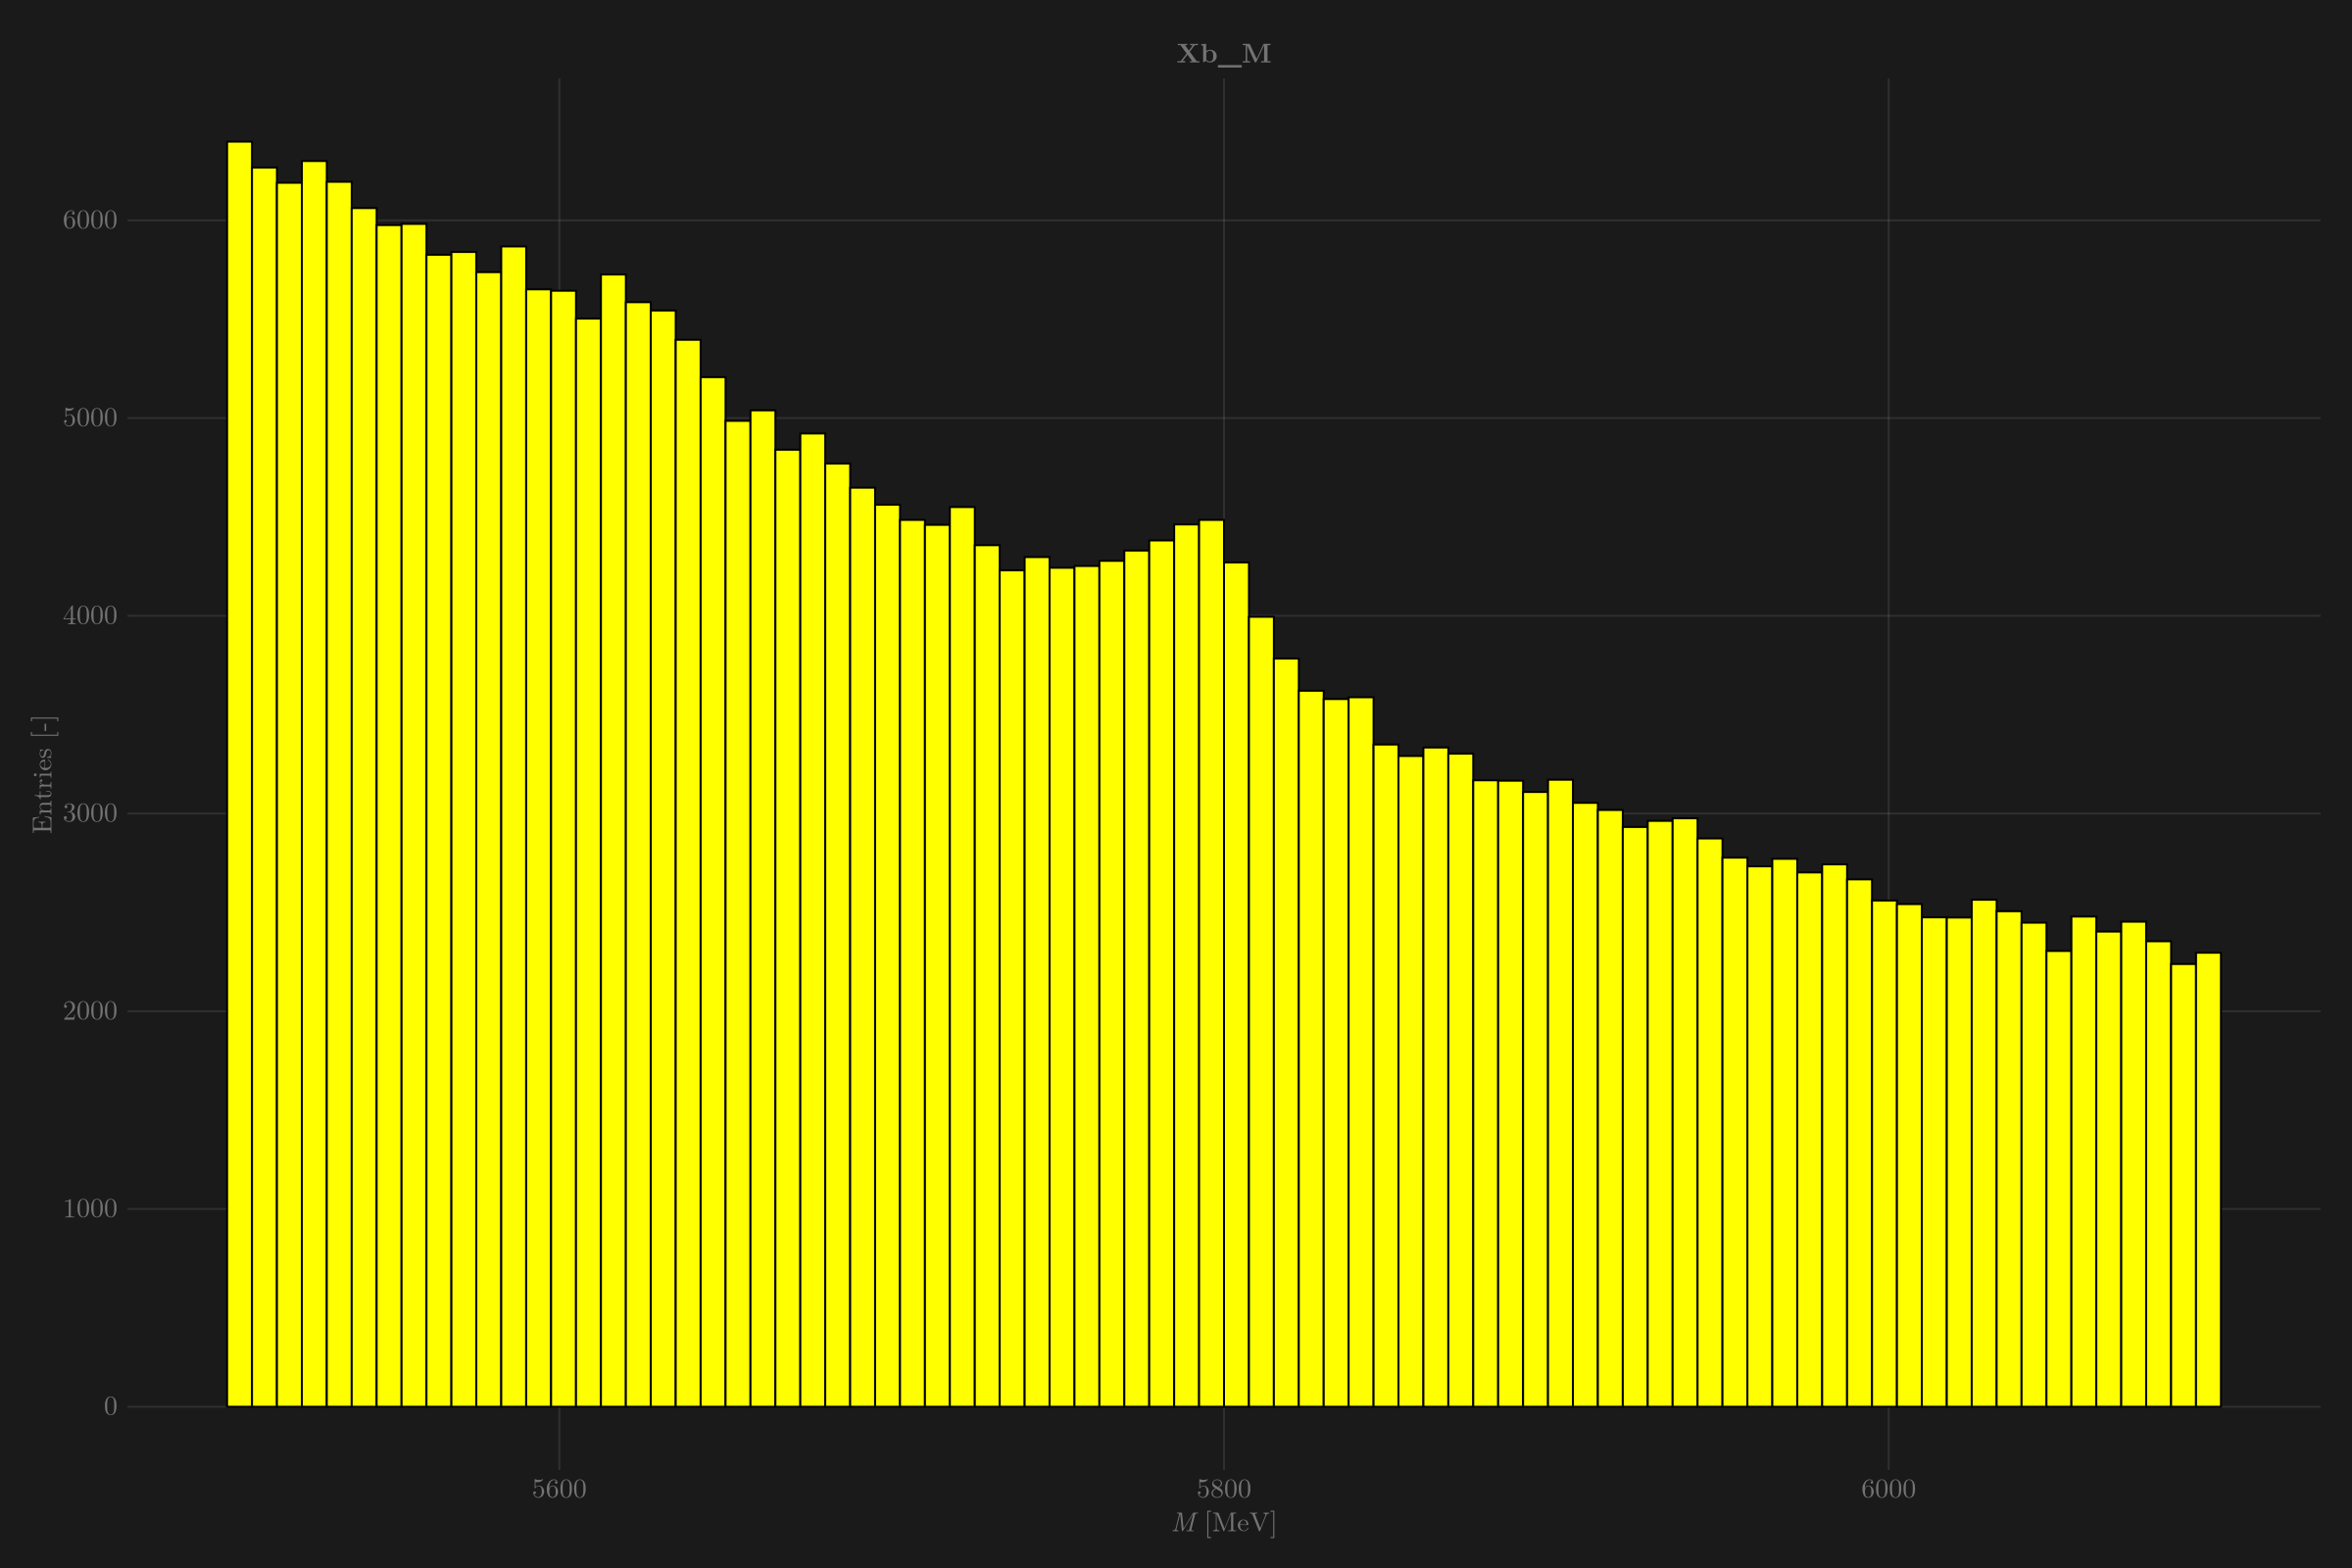

In [ ]:
plot_hist(
    df_exp.Xb_M,
    # "figures/exp_Xb_M",
    title = "Xb_M",
    xlabel = L"$M$ [MeV]"
)

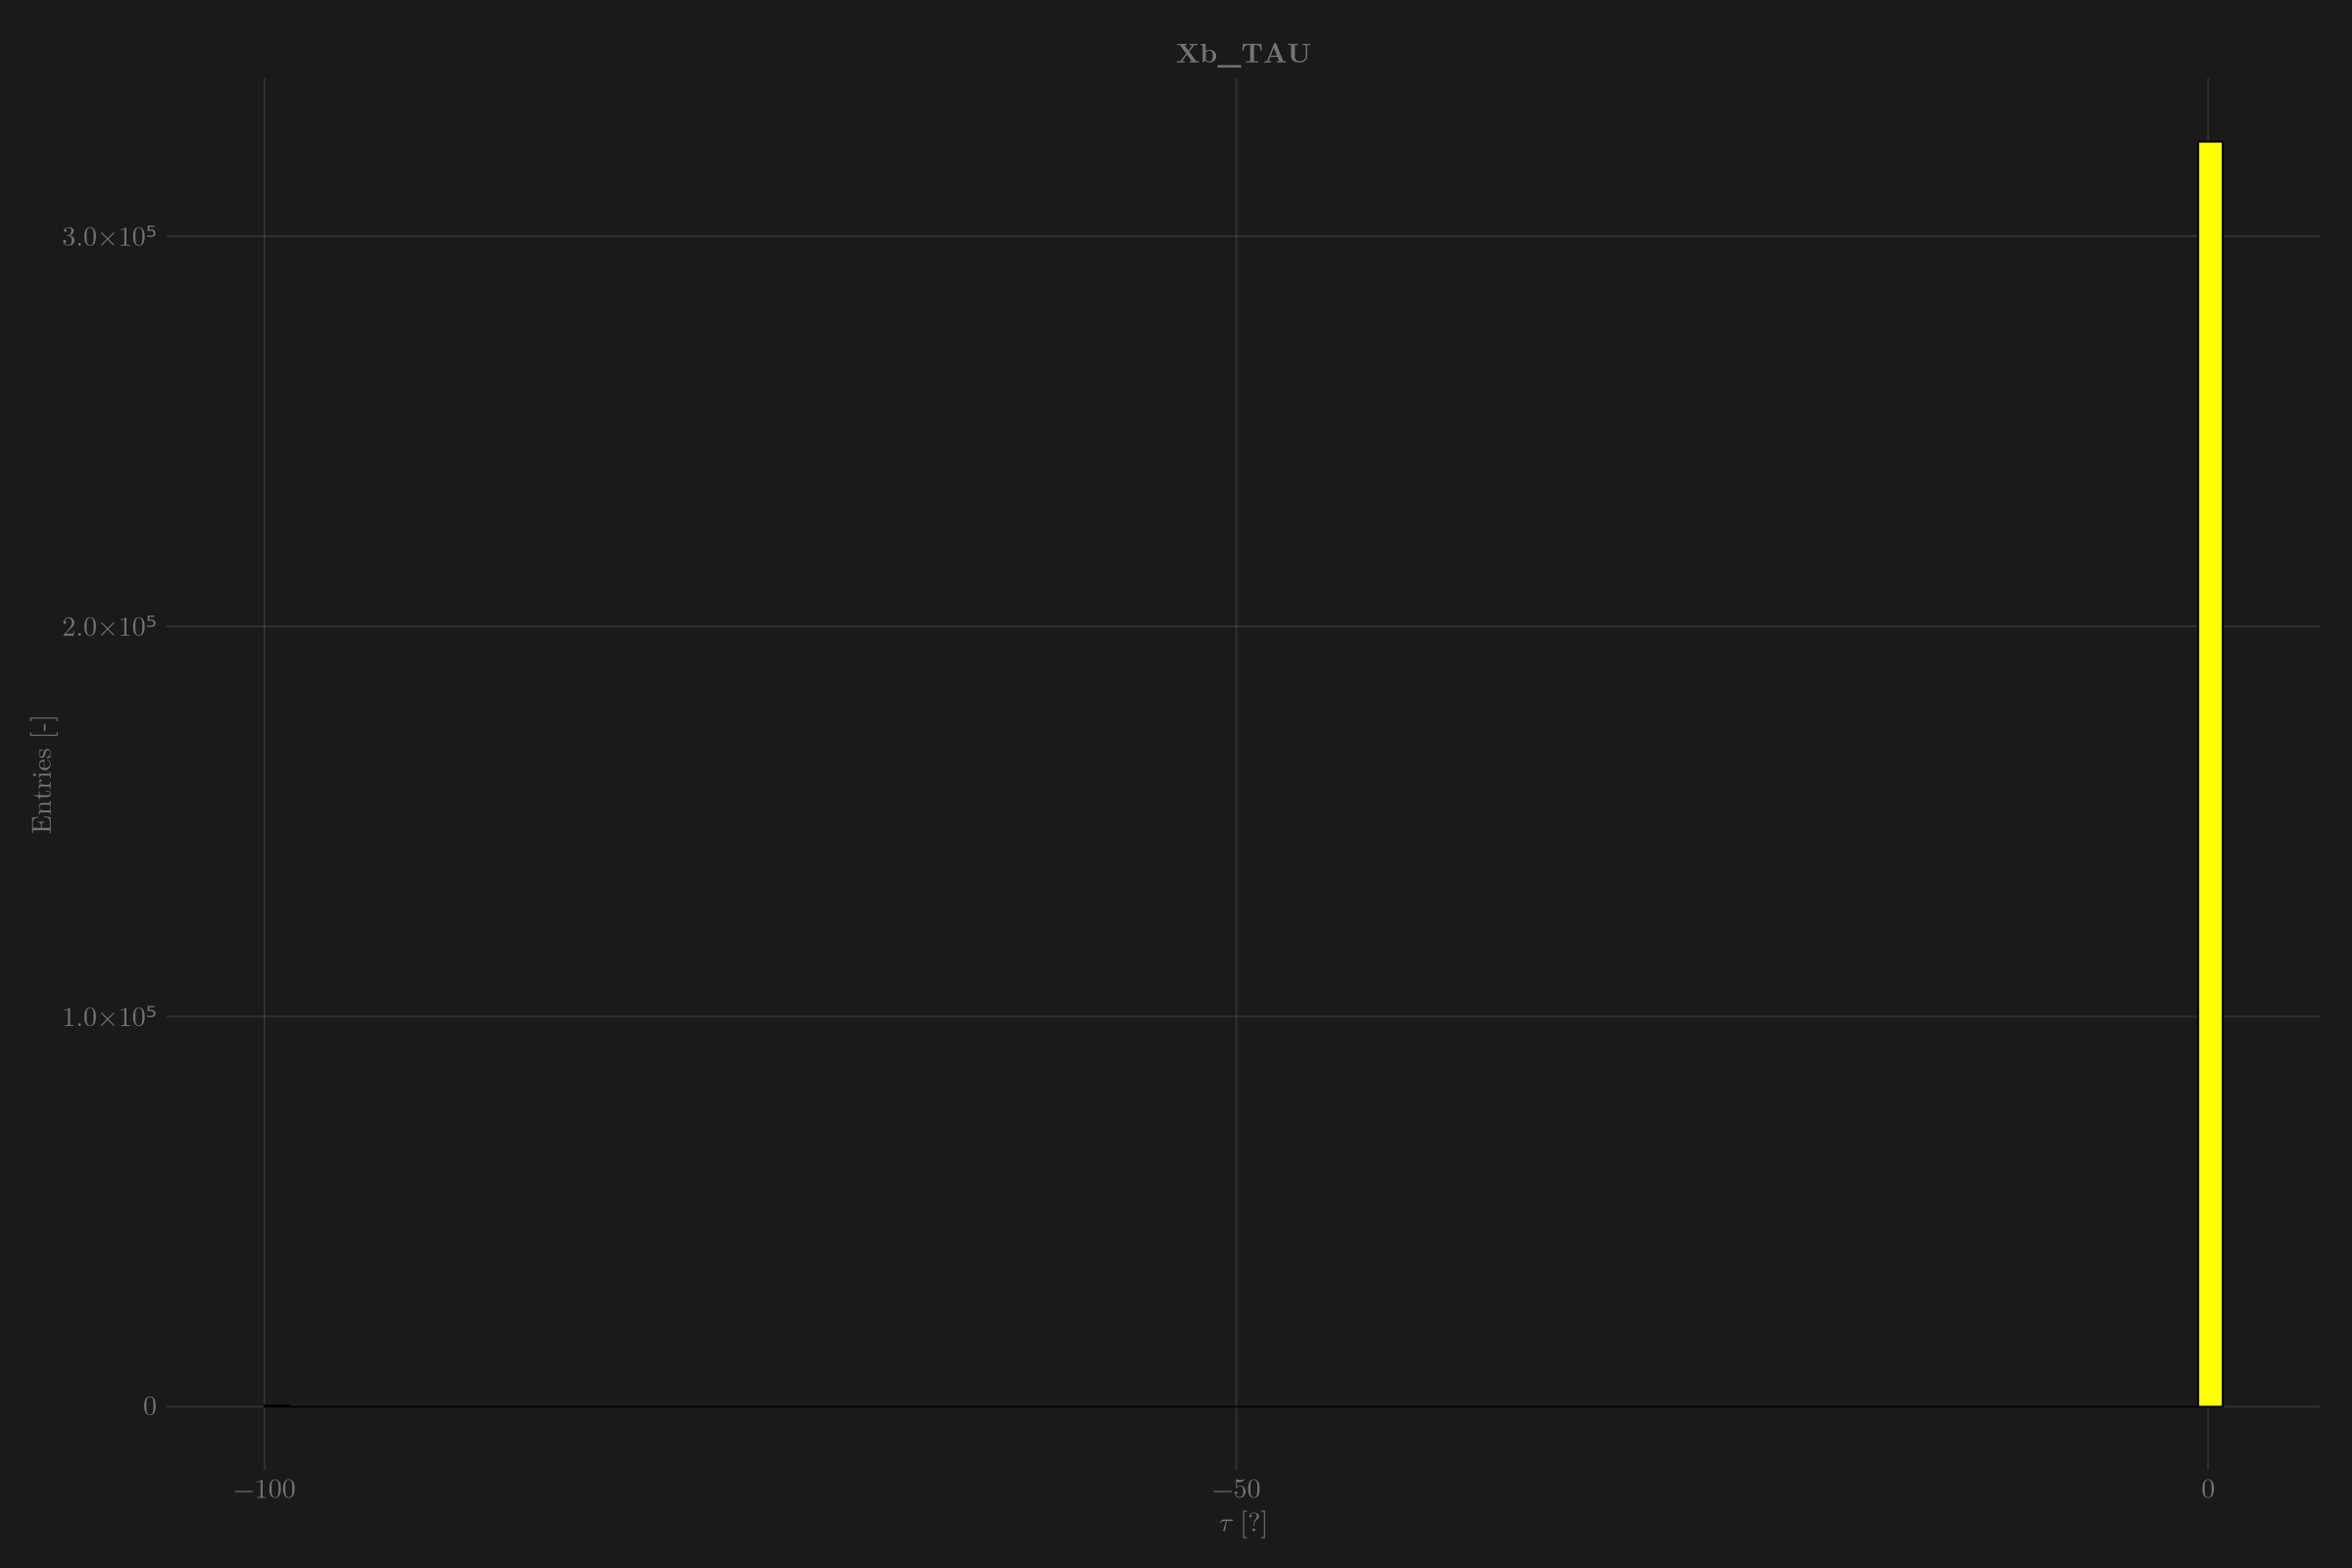

In [26]:
plot_hist(
    df_exp.Xb_TAU,
    title = "Xb_TAU",
    xlabel = L"$\tau$ [?]"
)

In [34]:
minimum(df_exp.Xb_TAU)

-100.0

I suppose that this one bin behaviour is caused by there being values of -100 in the data. From a physics standpoint $\tau$ cannot take on a negative value. I suppose that some values below 0 could be caused by measurement uncertainties, but -100 is almost definitely a value assigned when something wrong happened in the measurement.

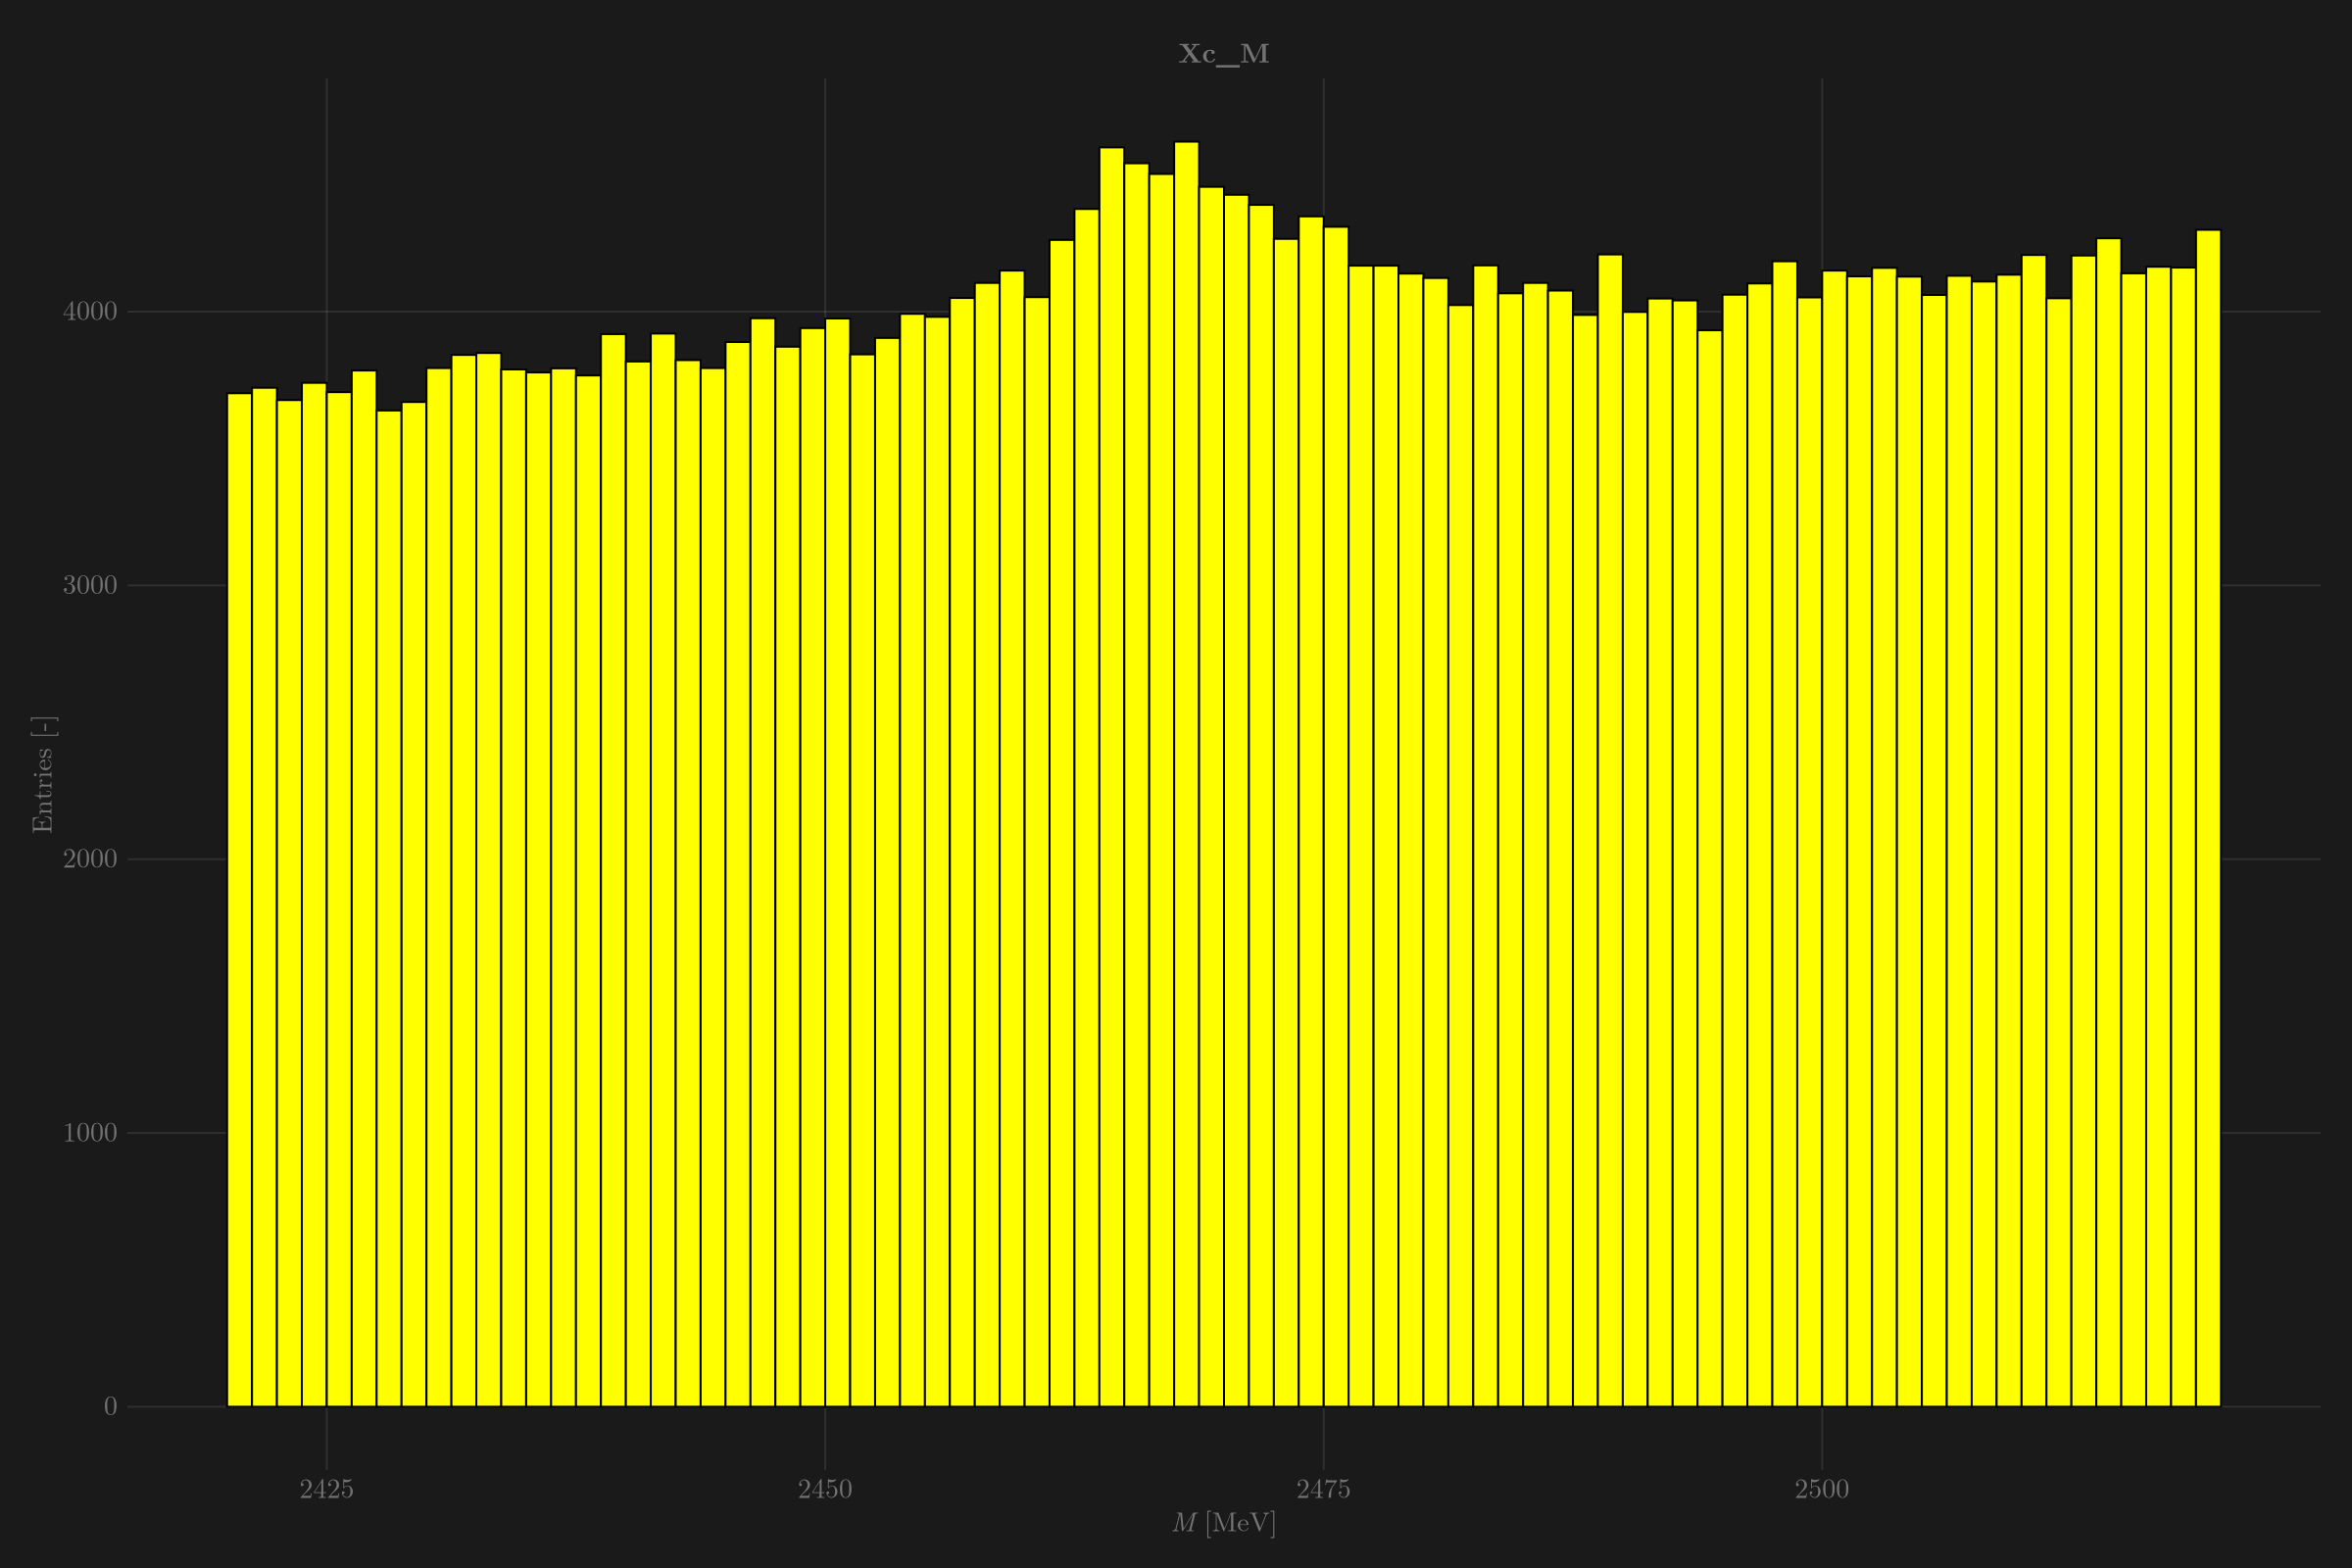

In [27]:
plot_hist(
    df_exp.Xc_M,
    "figures/exp_Xc_M",
    title = "Xc_M",
    xlabel = L"$M$ [MeV]"
)

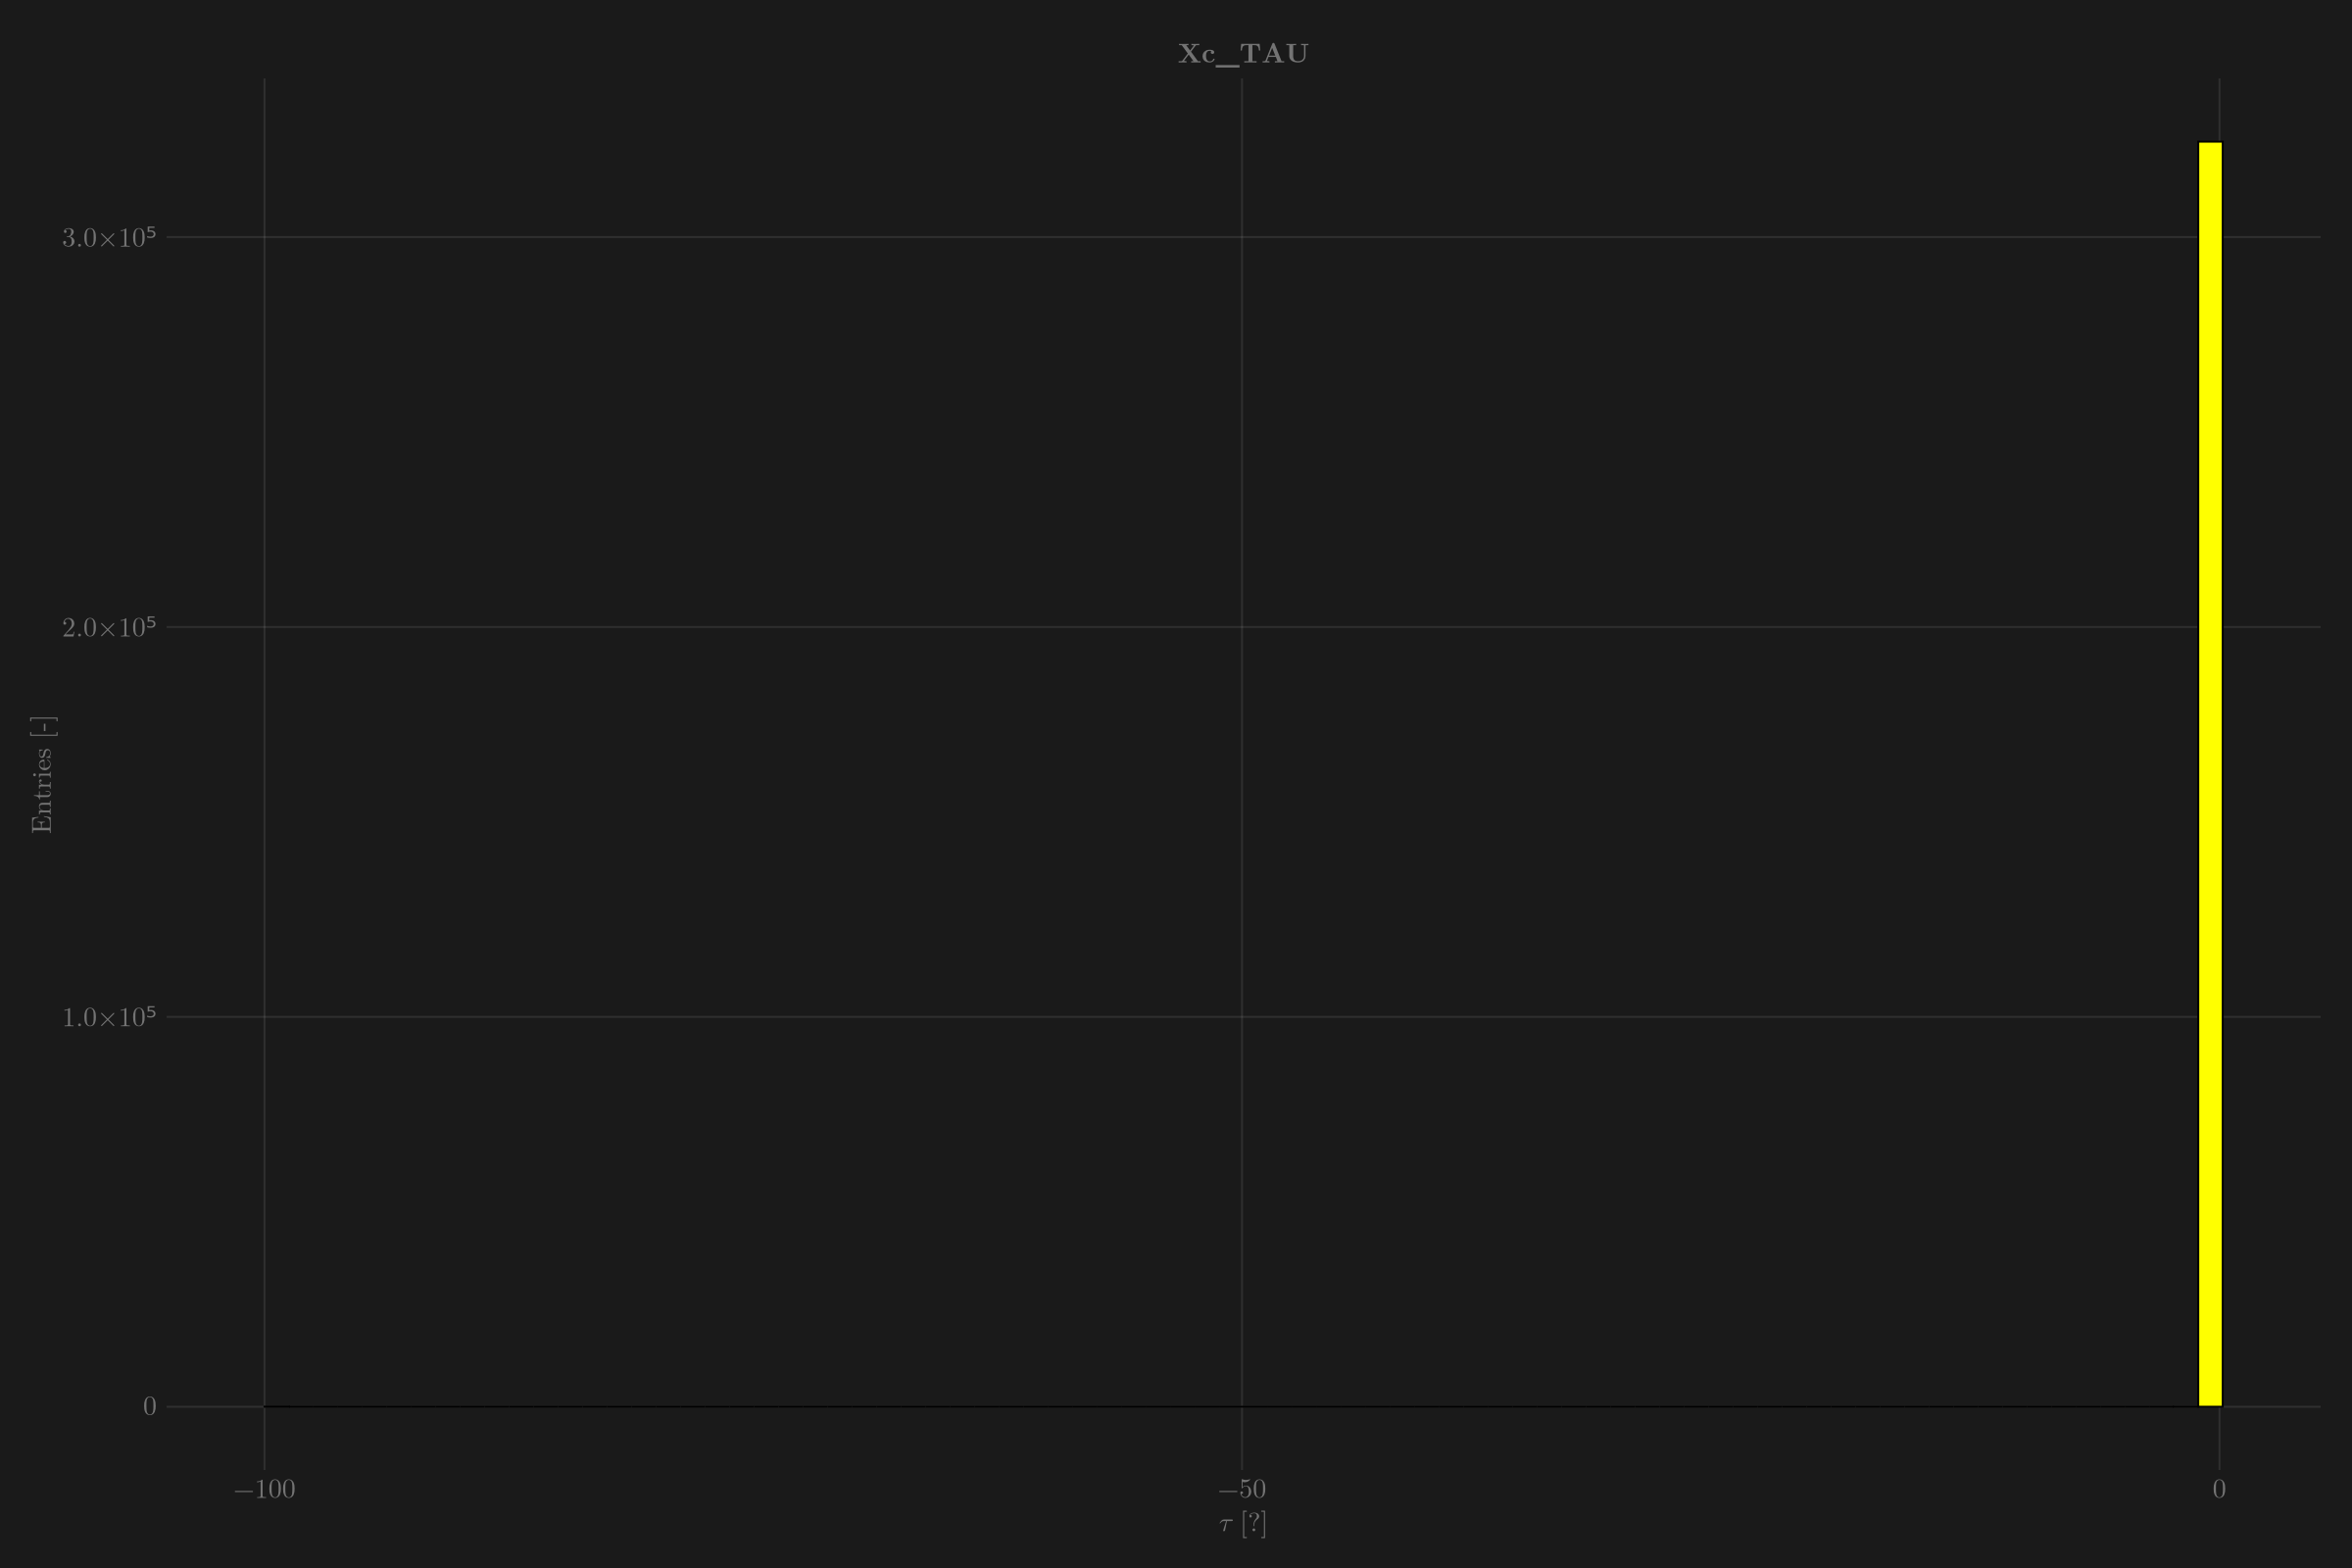

In [28]:
plot_hist(
    df_exp.Xc_TAU,
    title = "Xc_TAU",
    xlabel = L"$\tau$ [?]"
)

In [35]:
minimum(df_exp.Xc_TAU)

-100.0

same behaviour as in Xb_TAU

#### cut out weird values in the data